<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/SEM2/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb

Importing dataset

In [5]:
df = pd.read_csv("/content/drive/MyDrive/ipynb/sem2/datasets/prog2.csv")

In [6]:
df.shape

(506, 14)

In [7]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [8]:
df.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

No missing value. Our dataset is clean.

Pairplot Visualization to see association among all the attributes of the dataset

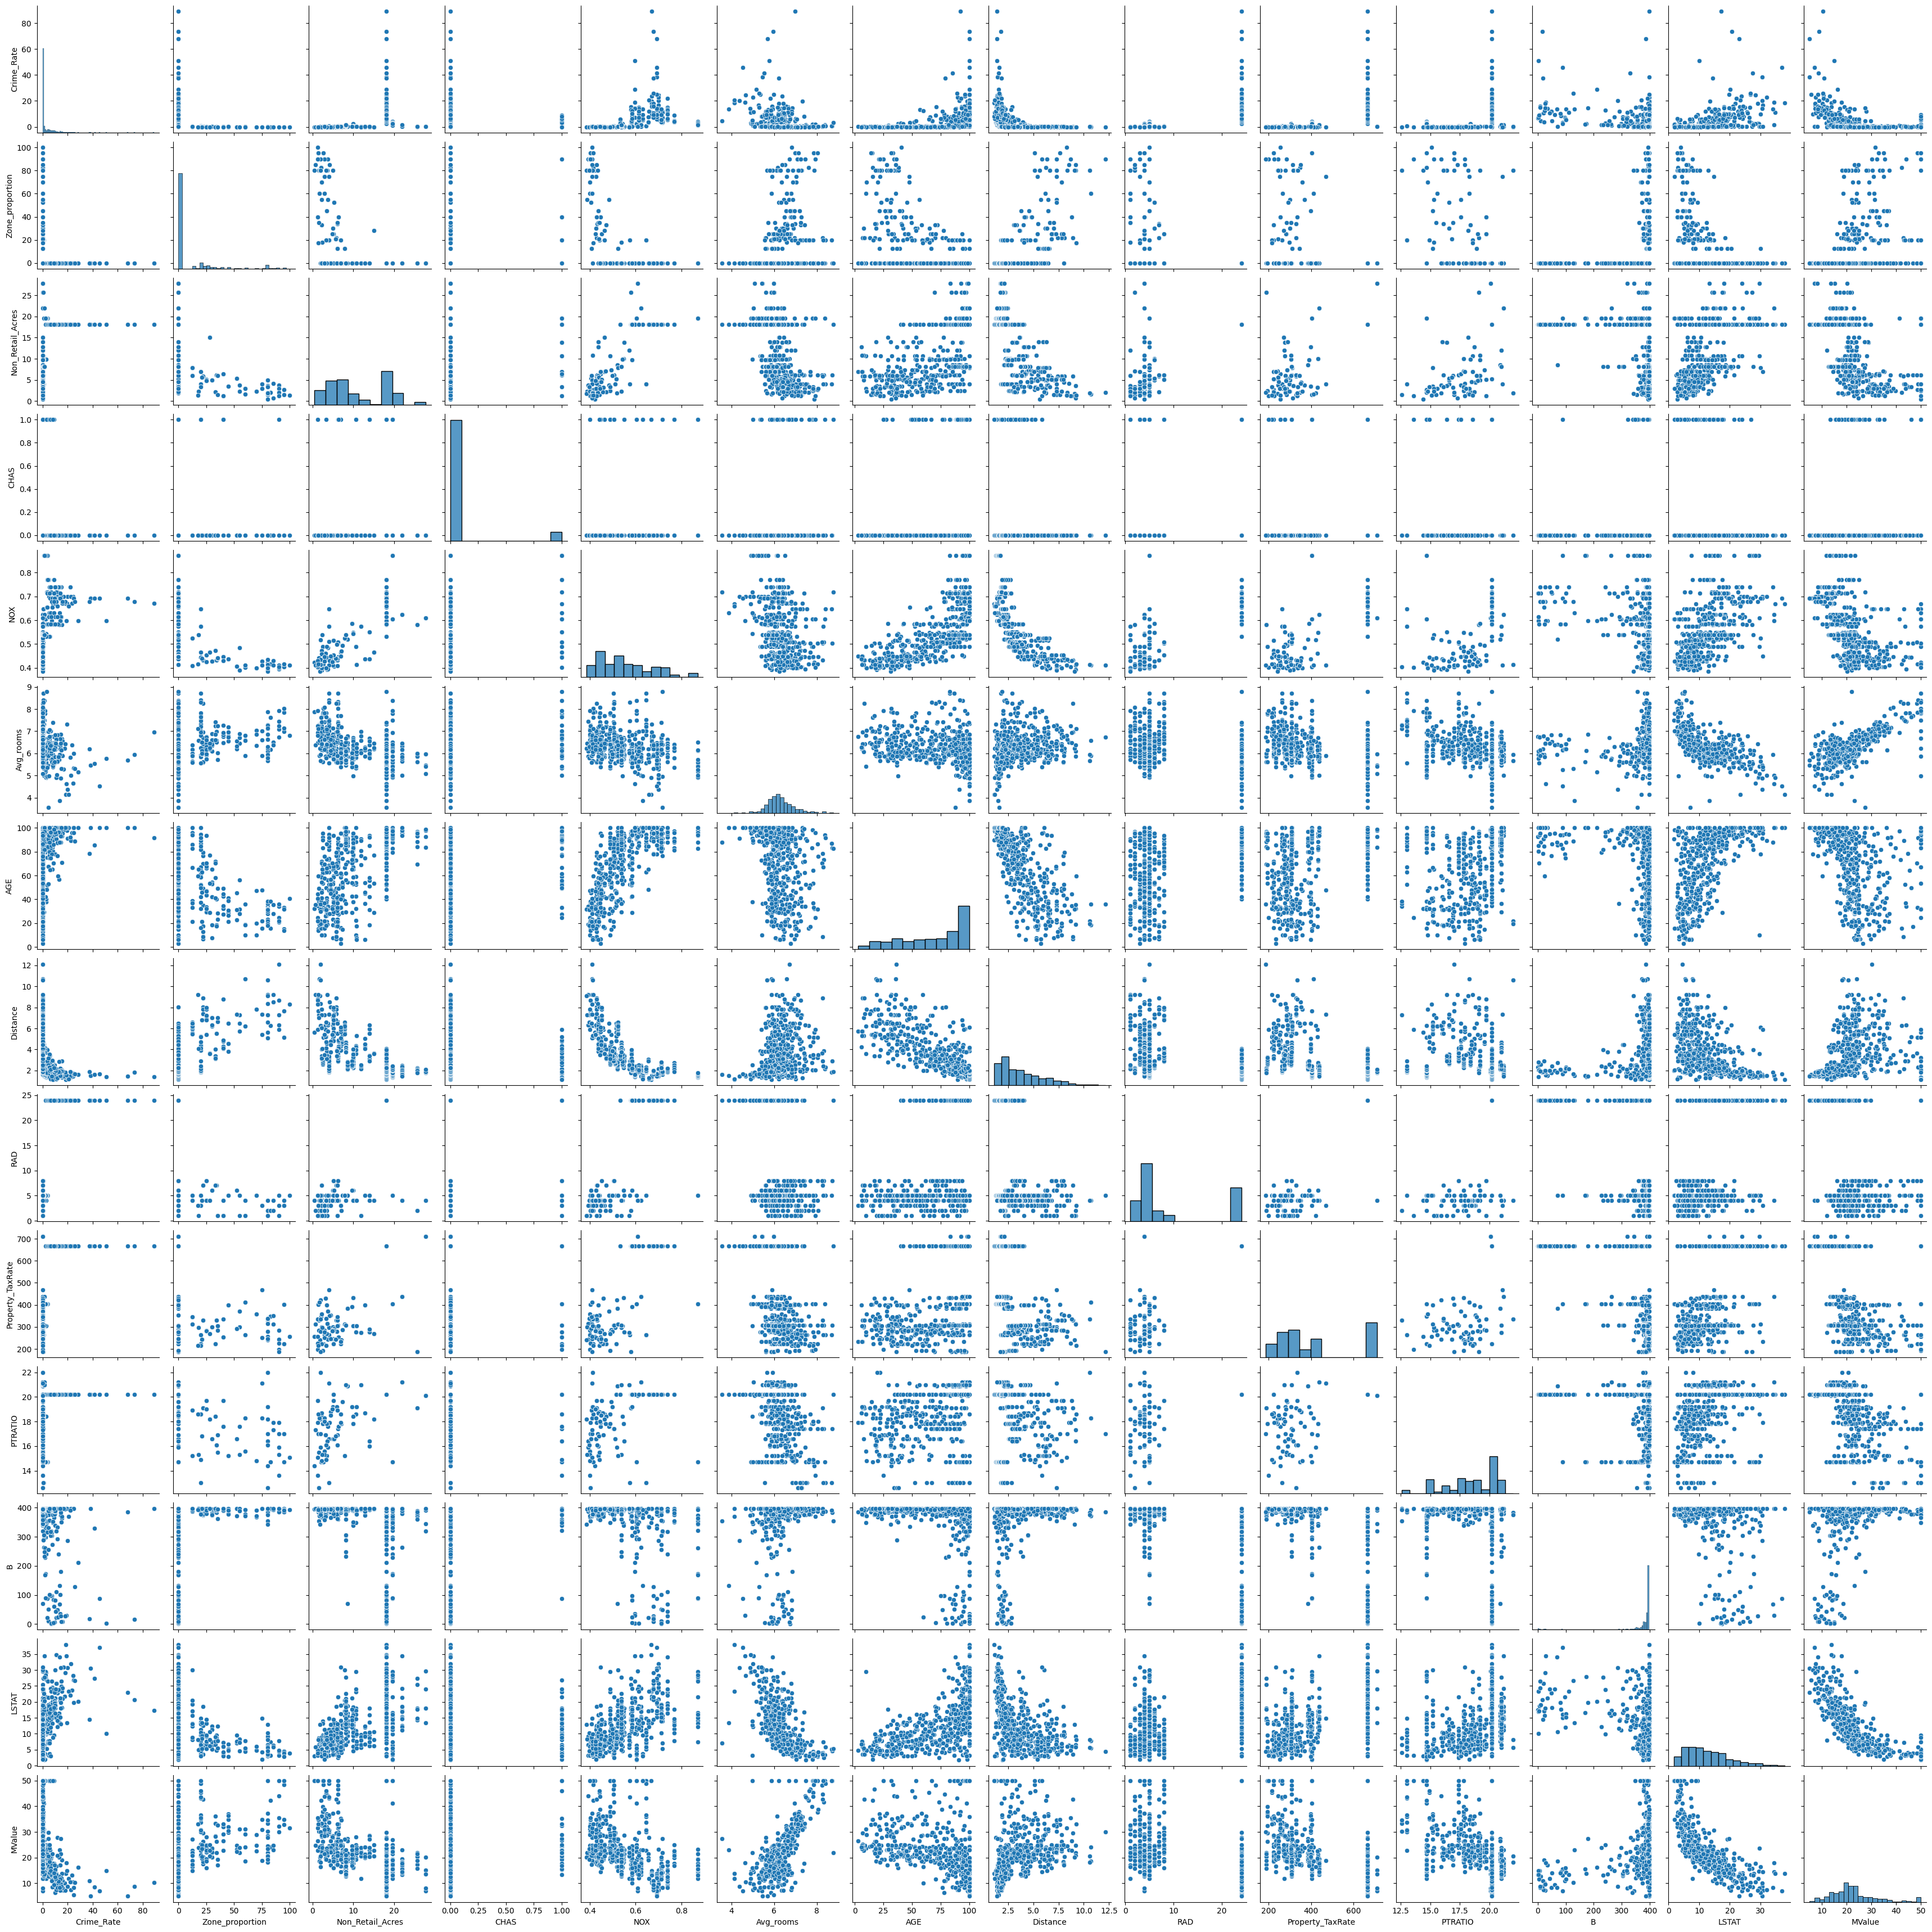

In [10]:
sb.pairplot(df)
pt.show()

Studying correlation among possible Predictor variables

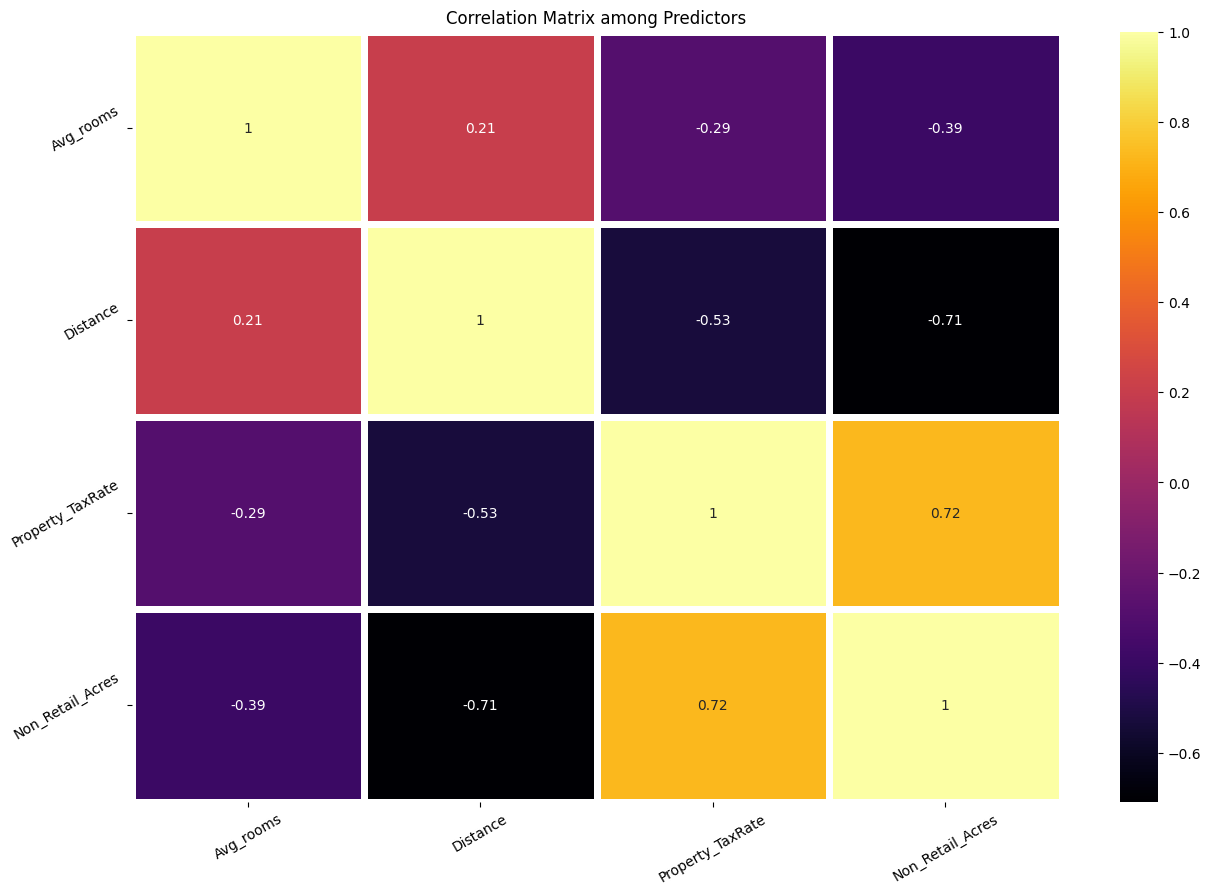

In [12]:
pt.figure(figsize=(15,10))
sb.heatmap(df[['Avg_rooms','Distance','Property_TaxRate','Non_Retail_Acres']].corr(),annot=True,cmap='inferno',linewidths=5)
pt.xticks(rotation=30)
pt.yticks(rotation=30)
pt.title("Correlation Matrix among Predictors")
pt.show()

Variance Inflation Factor among all 4 possible predictors

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df[['Avg_rooms','Distance','Property_TaxRate','Non_Retail_Acres']]
y = df['MValue']
vif = pd.Series([variance_inflation_factor(x.values,idx)
                 for idx in range(x.shape[1])],
                index=x.columns)
print(vif)

Avg_rooms           16.747965
Distance             6.880607
Property_TaxRate    13.861510
Non_Retail_Acres     9.598374
dtype: float64


Two final predictors shortlisted from previous VIF values

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df[['Distance','Non_Retail_Acres']]
y = df['MValue']
vif = pd.Series([variance_inflation_factor(x.values,idx)
                 for idx in range(x.shape[1])],
                index=x.columns)
print(vif)

Distance            1.468836
Non_Retail_Acres    1.468836
dtype: float64


Visualization of every predictor's association with the Median Value (target value) using scatter plot.

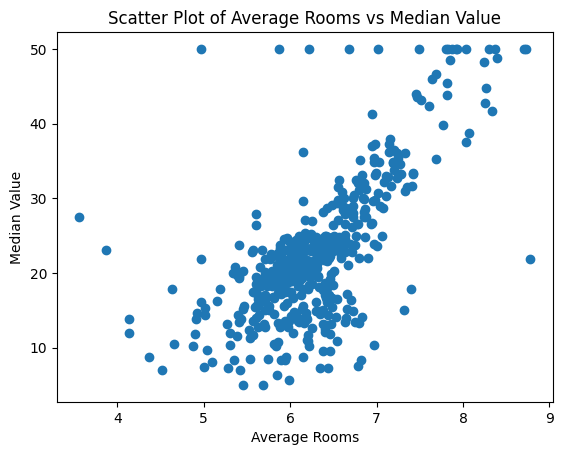

In [29]:
pt.scatter(df["Avg_rooms"],df['MValue'])
pt.xlabel("Average Rooms")
pt.ylabel("Median Value")
pt.title("Scatter Plot of Average Rooms vs Median Value")
pt.show()

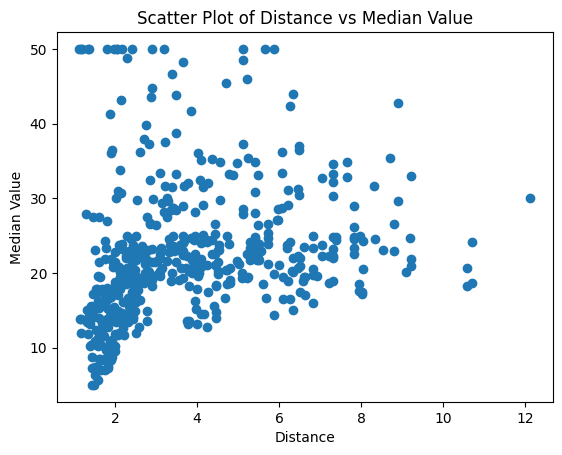

In [30]:
pt.scatter(df["Distance"],df['MValue'])
pt.xlabel("Distance")
pt.ylabel("Median Value")
pt.title("Scatter Plot of Distance vs Median Value")
pt.show()

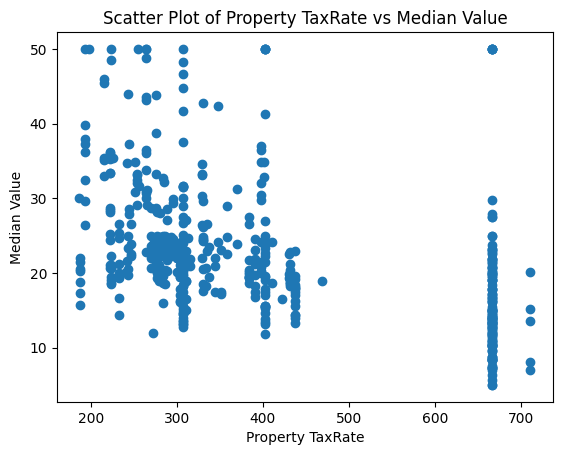

In [31]:
pt.scatter(df["Property_TaxRate"],df['MValue'])
pt.xlabel("Property TaxRate")
pt.ylabel("Median Value")
pt.title("Scatter Plot of Property TaxRate vs Median Value")
pt.show()

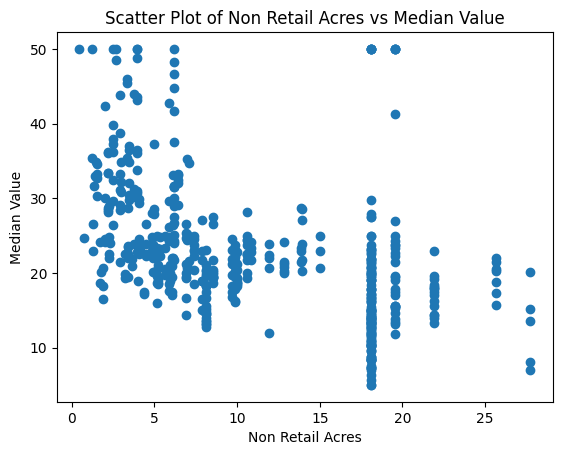

In [32]:
pt.scatter(df["Non_Retail_Acres"],df['MValue'])
pt.xlabel("Non Retail Acres")
pt.ylabel("Median Value")
pt.title("Scatter Plot of Non Retail Acres vs Median Value")
pt.show()

Training Dataframe

In [33]:
n_train = int(len(df) * 0.67)
df1 = df[['Distance','Non_Retail_Acres','MValue']].iloc[:n_train]
df1 #training dataframe

,Distance,Non_Retail_Acres,MValue
0,3.4952,2.89,33.2
1,2.7778,8.56,27.5
2,2.8561,8.56,26.5
3,2.7147,8.56,18.6
4,2.7147,8.56,19.3
...,...,...,...
334,3.7240,18.10,20.6
335,3.9917,18.10,21.2
336,3.5459,18.10,19.1
337,3.1523,18.10,20.6


Train-Test splitting in the ratio -> 67:33

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Linear Regression model fitted to training data

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Optimized Intercept and Coefficient value for the model, observed

In [36]:
print("Intercept: ",model.intercept_,"\nCoefficients: ",model.coef_)

Intercept:  38.091225709521446 
Coefficients:  [-1.27856928 -0.9452116 ]


In [37]:
y_predtr = model.predict(x_train)

Training Dataframe with predicted values

In [38]:
df1 = pd.concat([df1,pd.DataFrame(y_predtr, columns=['Pred_MValue'])],axis=1)
df1

,Distance,Non_Retail_Acres,MValue,Pred_MValue
0,3.4952,2.89,33.2,18.586090
1,2.7778,8.56,27.5,11.298488
2,2.8561,8.56,26.5,27.173298
3,2.7147,8.56,18.6,18.266320
4,2.7147,8.56,19.3,22.513394
...,...,...,...,...
334,3.7240,18.10,20.6,23.036968
335,3.9917,18.10,21.2,19.248261
336,3.5459,18.10,19.1,25.851924
337,3.1523,18.10,20.6,19.553287


Error value incorporated into Training Dataframe

In [39]:
df2 = pd.DataFrame({'Distance':df1['Distance'],
                    'Non_Retail_Acres':df1['Non_Retail_Acres'],
                    'MValue':df1['MValue'],
                    'Pred_MValue':y_predtr,
                    'Error': (df1['Pred_MValue'].astype(float) - df1['MValue'].astype(float))})
df2

,Distance,Non_Retail_Acres,MValue,Pred_MValue,Error
0,3.4952,2.89,33.2,18.586090,-14.613910
1,2.7778,8.56,27.5,11.298488,-16.201512
2,2.8561,8.56,26.5,27.173298,0.673298
3,2.7147,8.56,18.6,18.266320,-0.333680
4,2.7147,8.56,19.3,22.513394,3.213394
...,...,...,...,...,...
334,3.7240,18.10,20.6,23.036968,2.436968
335,3.9917,18.10,21.2,19.248261,-1.951739
336,3.5459,18.10,19.1,25.851924,6.751924
337,3.1523,18.10,20.6,19.553287,-1.046713


Testing Dataframe

In [40]:
n_train = int(len(df) * 0.67)
df3 = df[['Distance','Non_Retail_Acres','MValue']].iloc[n_train:]
df3 #testing dataframe

,Distance,Non_Retail_Acres,MValue
339,1.7554,27.74,7.0
340,1.8226,27.74,8.1
341,1.8681,27.74,13.6
342,2.1099,27.74,20.1
343,2.3817,9.69,21.8
...,...,...,...
501,1.8956,18.10,10.8
502,1.9879,18.10,11.8
503,2.0720,18.10,14.9
504,2.1980,18.10,12.6


In [41]:
y_predte = model.predict(x_test)

Testing Dataframe with predicted and error values

In [42]:
df3['Pred_MValue'] = y_predte
df4 = pd.DataFrame({
    'Distance': df3['Distance'],
    'Non_Retail_Acres': df3['Non_Retail_Acres'],
    'MValue': df3['MValue'],
    'Pred_MValue': df3['Pred_MValue'],
    'Error': (df3['Pred_MValue'] - df3['MValue'])
})
df4

,Distance,Non_Retail_Acres,MValue,Pred_MValue,Error
339,1.7554,27.74,7.0,26.503758,19.503758
340,1.8226,27.74,8.1,19.481600,11.381600
341,1.8681,27.74,13.6,18.141659,4.541659
342,2.1099,27.74,20.1,16.529864,-3.570136
343,2.3817,9.69,21.8,30.890709,9.090709
...,...,...,...,...,...
501,1.8956,18.10,10.8,23.126979,12.326979
502,1.9879,18.10,11.8,17.020226,5.220226
503,2.0720,18.10,14.9,18.547605,3.647605
504,2.1980,18.10,12.6,15.083137,2.483137


Evaluation our model

MSE for training data

In [43]:
MSEtr = sum(df2['Error']**2)/n_train
MSEtr

122.54691788988033

MSE for testing data

In [45]:
MSEte = sum(df4['Error']**2)/(len(df)-n_train)
MSEte

81.94833294690257

R2 score for training data

In [46]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_predtr)
r2

0.2581499484166435

R2 score for testing data

In [47]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predte)
r2

0.20665217673469405

Adjusted R2 score for training data

In [48]:
adjusted_rsquare_score = 1 - (1-model.score(x_train,y_train))*(len(y_train)-1)/(len(y_train)-x.shape[1]-1)
print(adjusted_rsquare_score)

0.25373417430007594


Adjusted R2 score for testing data

In [49]:
adjusted_rsquare_score = 1 - (1-model.score(x_test,y_test))*(len(y_test)-1)/(len(y_test)-x.shape[1]-1)
print(adjusted_rsquare_score)

0.19697720328023915


Multiple Linear Regression Visualization for Training Data

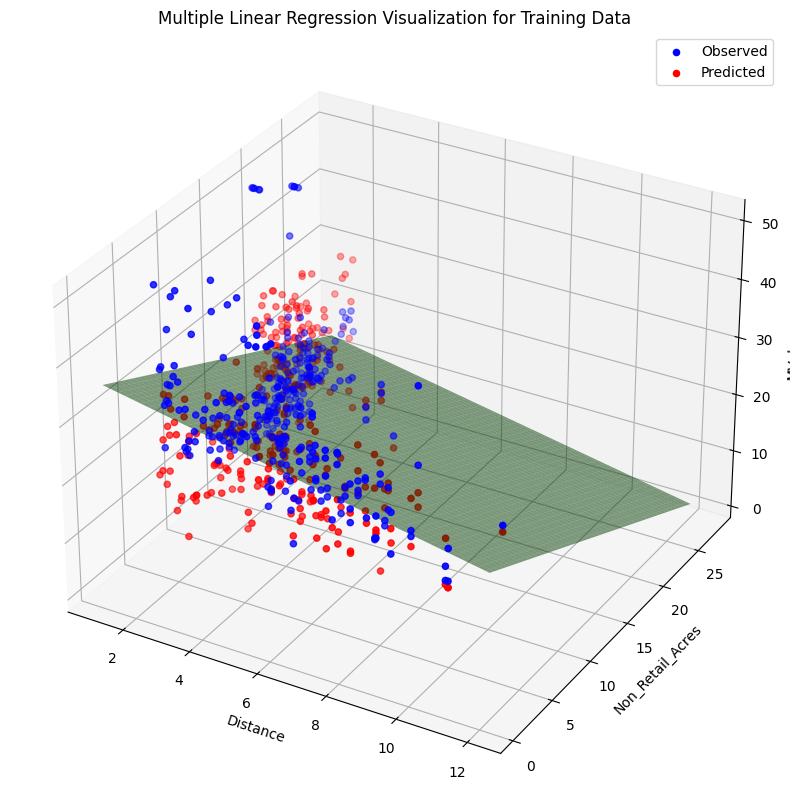

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming df3 contains the data and 'Distance' and 'Non_Retail_Acres' are the predictor variables
X = df1[['Distance', 'Non_Retail_Acres']]
y_observed = df1['MValue']
y_predicted = df1['Pred_MValue']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y_observed)

# Create a meshgrid for the plane
x1_range = np.linspace(min(X['Distance']), max(X['Distance']), 100)
x2_range = np.linspace(min(X['Non_Retail_Acres']), max(X['Non_Retail_Acres']), 100)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
plane = model.intercept_ + model.coef_[0] * x1_mesh + model.coef_[1] * x2_mesh

# Visualize the 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of observed values
ax.scatter(X['Distance'], X['Non_Retail_Acres'], y_observed, color='blue', label='Observed')

# Scatter plot of predicted values
ax.scatter(X['Distance'], X['Non_Retail_Acres'], y_predicted, color='red', label='Predicted')

# Plot the best fit plane
ax.plot_surface(x1_mesh, x2_mesh, plane, alpha=0.5, color='green')

ax.set_xlabel('Distance')
ax.set_ylabel('Non_Retail_Acres')
ax.set_zlabel('MValue')
ax.set_title('Multiple Linear Regression Visualization for Training Data')

# Add legend with explicit labels
ax.legend(['Observed', 'Predicted'])

plt.show()

Multiple Linear Regression Visualization for Testing Data

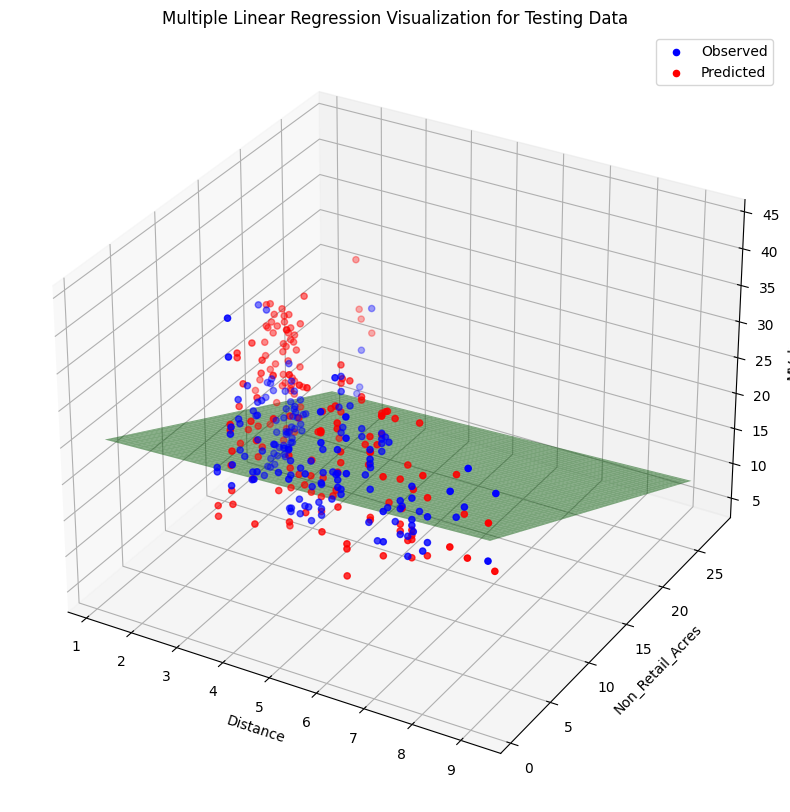

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming df3 contains the data and 'Distance' and 'Non_Retail_Acres' are the predictor variables
X = df3[['Distance', 'Non_Retail_Acres']]
y_observed = df3['MValue']
y_predicted = df3['Pred_MValue']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y_observed)

# Create a meshgrid for the plane
x1_range = np.linspace(min(X['Distance']), max(X['Distance']), 100)
x2_range = np.linspace(min(X['Non_Retail_Acres']), max(X['Non_Retail_Acres']), 100)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
plane = model.intercept_ + model.coef_[0] * x1_mesh + model.coef_[1] * x2_mesh

# Visualize the 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of observed values
ax.scatter(X['Distance'], X['Non_Retail_Acres'], y_observed, color='blue', label='Observed')

# Scatter plot of predicted values
ax.scatter(X['Distance'], X['Non_Retail_Acres'], y_predicted, color='red', label='Predicted')

# Plot the best fit plane
ax.plot_surface(x1_mesh, x2_mesh, plane, alpha=0.5, color='green')

ax.set_xlabel('Distance')
ax.set_ylabel('Non_Retail_Acres')
ax.set_zlabel('MValue')
ax.set_title('Multiple Linear Regression Visualization for Testing Data')

# Add legend with explicit labels
ax.legend(['Observed', 'Predicted'])

plt.show()